In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:

class LogisticRegression(object):
    def __init__(self,x,y,alpha=0.01,no_of_iterations=10000):
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.alpha = alpha
        self.x = x
        self.no_of_iterations = no_of_iterations
        self.x= self.x - (self.x).mean(axis=0)
        max = np.abs(self.x).max(axis=0)
        max[max==0] = 1
        self.x = self.x / max
        self.y =y
        self.para = np.random.randn(self.n)
        self.c = 0
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    def loss(self,y_pred,y):
        loss =(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).sum()
        return loss;

    def fit(self):
        self.y_pred = (self.x).dot(self.para) + self.c
        self.y_pred = self.sigmoid(self.y_pred).round()
        for i in range(self.no_of_iterations):
            self.para = self.para -(self.alpha/self.m)*(self.x.T).dot(self.y_pred - self.y)
            self.c-=self.alpha*np.sum(self.y_pred-self.y)/(self.m)
            self.y_pred = (self.x).dot(self.para) + self.c
            self.y_pred = self.sigmoid(self.y_pred).round()
        self.y_pred = (self.x).dot(self.para) + self.c  
        self.y_pred = self.sigmoid(self.y_pred).round()
        loss = self.loss(self.y_pred,self.y)
        return loss
    def pred(self, X=None,Y = None):
        if (X==None):
            X = self.x
        else:
            X= X - (X).mean(axis=0)
            max = np.abs(X.max(axis=0))
            max[max==0] = 1
            X = X / max
        if(Y==None):
            Y = self.y
        y_pred = (X).dot(self.para) + self.c
        y_pred = self.sigmoid(y_pred).round()
        return y_pred

    def para(self):
        return self.para
    def constant(self):
        return self.c
    def score(self,X=None,Y = None):
        y_pred = self.pred(X,Y)
        correct= (y_pred==Y)
        return np.mean(correct)

     

In [3]:
iris = datasets.load_iris()

In [4]:
 x_index = 0
 y_index = 1

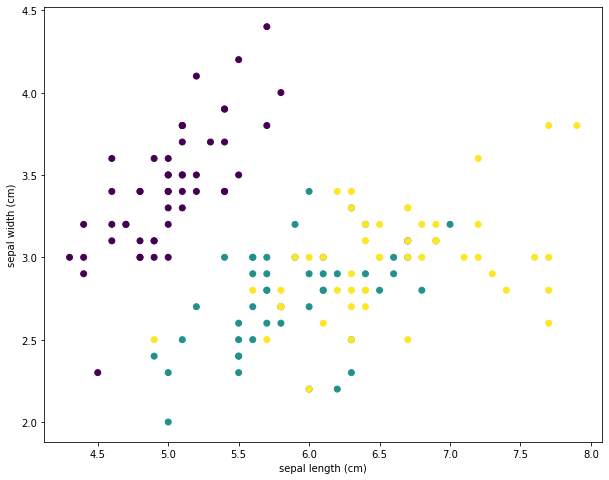

In [5]:
    plt.figure(figsize=(10, 8))
    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
    
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
    plt.show()

In [6]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1


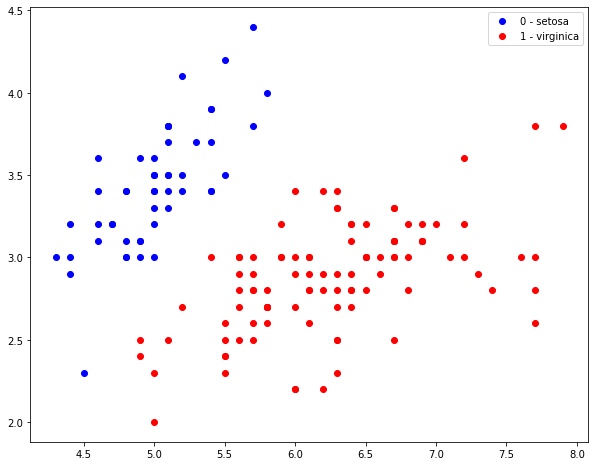

In [7]:
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0 - setosa')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1 - virginica')
    plt.legend()
    plt.show()

In [8]:
model=LogisticRegression(X,y)

In [9]:
model.fit()

<ipython-input-2-8cc5d5462134>:19: RuntimeWarning: divide by zero encountered in log
  loss =(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).sum()
<ipython-input-2-8cc5d5462134>:19: RuntimeWarning: invalid value encountered in multiply
  loss =(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).sum()


nan

In [10]:
model.para

array([ 0.54535066, -0.45760688])

In [11]:
X.shape

(150, 2)

In [12]:
n = X.shape[1]

In [13]:
n

2

In [14]:
np.random.randn(n,1)

array([[-0.57399533],
       [ 1.47498741]])